DATASET DOWNLOAD AND EXTRACT

In [1]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
from utility import plot_confusion_matrix
import tensorflow.keras.layers as layer
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [2]:
seed = 1231829
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
from data_loader import get_data
X_data, labels = get_data()

/Users/denisderonjic/Repos/ActivityRecognition/data_loader.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return (np.array(X_data), labels)


In [4]:
print(X_data.shape)
print(labels.shape)

(761,)
(761,)


FALLING


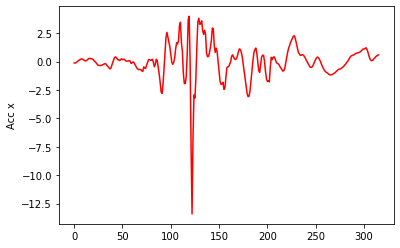

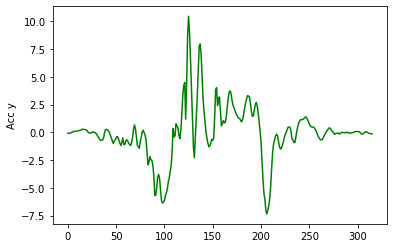

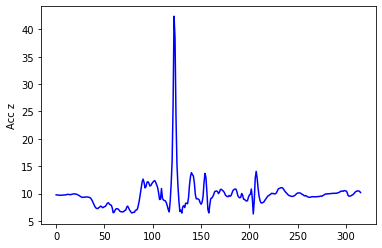

In [5]:
import matplotlib.pyplot as plt

measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [6]:
from data_transformation import frame_data

X_data, y_data = frame_data(X_data, labels)

In [7]:
X_data = X_data[:,:, :6] #Dropping magnetometer

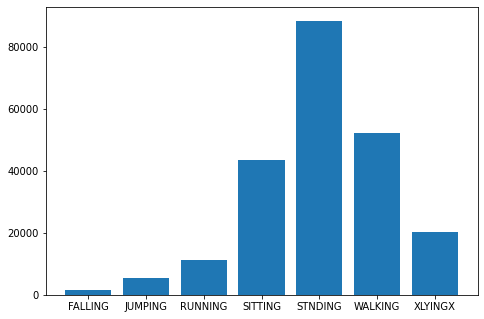

In [8]:
unique, counts = np.unique(y_data, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique,counts)
plt.show()

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

y_data = le.fit_transform(y_data)

In [10]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

num_labels = len(le_name_mapping)
print(num_labels)

{'FALLING': 0, 'JUMPING': 1, 'RUNNING': 2, 'SITTING': 3, 'STNDING': 4, 'WALKING': 5, 'XLYINGX': 6}
7


In [11]:
import data_transformation as dt

#X_data, y_data = dt.data_augmentation(X_data, y_data, [dt.jitter])

FALLING


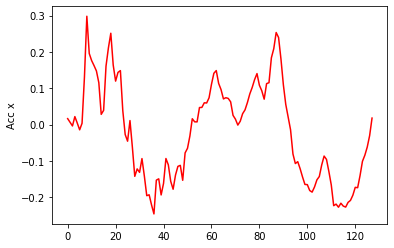

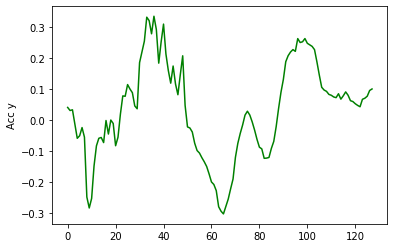

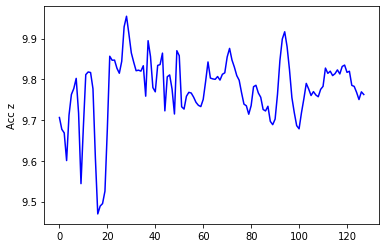

In [12]:
measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

stratifiedSplit = True

if stratifiedSplit:
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=seed)
    for train_index, test_index in split.split(X_data, y_data):
        X_train.append(X_data[train_index])
        y_train.append(y_data[train_index])
        X_test.append(X_data[test_index])
        y_test.append(y_data[test_index])
    X_train = np.array(X_train[0])
    y_train = np.array(y_train[0])
    X_test = np.array(X_test[0])
    y_test = np.array(y_test[0])
else:
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=seed)

In [14]:
#check https://stackoverflow.com/questions/59979763/cant-get-done-conv1d-with-tf-keras
#check https://stats.stackexchange.com/questions/264546/difference-between-samples-time-steps-and-features-in-neural-network
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


In [15]:
from data_transformation import data_normalization

X_train = data_normalization(X_train)
X_test = data_normalization(X_test)

2021-08-24 13:07:02.861467: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-24 13:07:02.861597: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz




Training on FALLING


Epoch 1/10
51/51 [==============================] - 1s 13ms/step - loss: 3.5631 - val_loss: 3.0809
Epoch 2/10
51/51 [==============================] - 1s 11ms/step - loss: 3.1031 - val_loss: 2.9842
Epoch 3/10
51/51 [==============================] - 1s 12ms/step - loss: 2.9398 - val_loss: 2.8038
Epoch 4/10
51/51 [==============================] - 1s 13ms/step - loss: 2.7424 - val_loss: 2.6423
Epoch 5/10
51/51 [==============================] - 1s 14ms/step - loss: 2.5192 - val_loss: 2.4714
Epoch 6/10
51/51 [==============================] - 1s 15ms/step - loss: 2.3689 - val_loss: 2.4221
Epoch 7/10
51/51 [==============================] - 1s 15ms/step - loss: 2.2665 - val_loss: 2.4071
Epoch 8/10
51/51 [==============================] - 1s 14ms/step - loss: 2.3421 - val_loss: 2.2642
Epoch 9/10
51/51 [==============================] - 1s 14ms/step - loss: 2.1115 - val_loss: 2.3295
Epoch 10/10
51/51 [==============================] - 1s 14ms/step - loss: 2.0207 - va

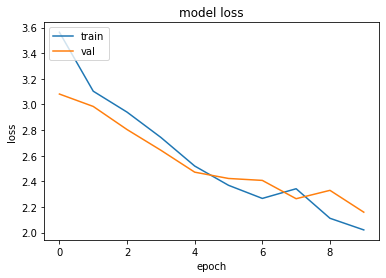



Training on JUMPING


Epoch 1/10
195/195 [==============================] - 3s 14ms/step - loss: 4.7547 - val_loss: 4.3723
Epoch 2/10
195/195 [==============================] - 3s 15ms/step - loss: 4.3170 - val_loss: 4.2363
Epoch 3/10
195/195 [==============================] - 3s 14ms/step - loss: 4.1149 - val_loss: 3.9412
Epoch 4/10
195/195 [==============================] - 3s 14ms/step - loss: 3.8179 - val_loss: 3.7408
Epoch 5/10
195/195 [==============================] - 3s 15ms/step - loss: 3.5697 - val_loss: 3.4546
Epoch 6/10
195/195 [==============================] - 3s 15ms/step - loss: 3.3217 - val_loss: 3.2514
Epoch 7/10
195/195 [==============================] - 3s 15ms/step - loss: 3.0901 - val_loss: 3.0576
Epoch 8/10
195/195 [==============================] - 3s 14ms/step - loss: 2.9258 - val_loss: 2.9253
Epoch 9/10
195/195 [==============================] - 3s 15ms/step - loss: 2.7534 - val_loss: 2.8706
Epoch 10/10
195/195 [==============================] - 3s 16ms/step

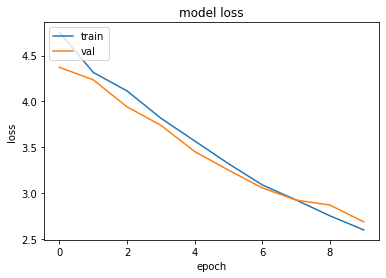



Training on RUNNING


Epoch 1/10
389/389 [==============================] - 6s 14ms/step - loss: 6.5383 - val_loss: 5.4995
Epoch 2/10
389/389 [==============================] - 6s 14ms/step - loss: 4.8778 - val_loss: 4.4175
Epoch 3/10
389/389 [==============================] - 6s 15ms/step - loss: 4.1402 - val_loss: 3.9345
Epoch 4/10
389/389 [==============================] - 5s 14ms/step - loss: 3.6431 - val_loss: 3.5881
Epoch 5/10
389/389 [==============================] - 6s 15ms/step - loss: 3.2599 - val_loss: 3.1746
Epoch 6/10
389/389 [==============================] - 6s 15ms/step - loss: 2.9599 - val_loss: 2.9796
Epoch 7/10
389/389 [==============================] - 6s 15ms/step - loss: 2.7043 - val_loss: 2.7380
Epoch 8/10
389/389 [==============================] - 6s 14ms/step - loss: 2.5230 - val_loss: 2.6558
Epoch 9/10
389/389 [==============================] - 5s 14ms/step - loss: 2.3856 - val_loss: 2.4879
Epoch 10/10
389/389 [==============================] - 5s 14ms/step

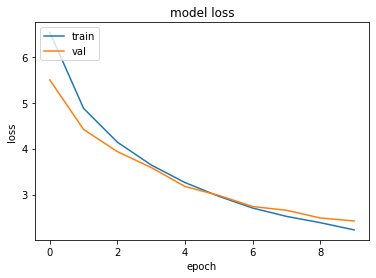



Training on SITTING


Epoch 1/10
1519/1519 [==============================] - 23s 15ms/step - loss: 0.0494 - val_loss: 0.0352
Epoch 2/10
1519/1519 [==============================] - 23s 15ms/step - loss: 0.0315 - val_loss: 0.0239
Epoch 3/10
1519/1519 [==============================] - 23s 15ms/step - loss: 0.0232 - val_loss: 0.0177
Epoch 4/10
1519/1519 [==============================] - 23s 15ms/step - loss: 0.0181 - val_loss: 0.0131
Epoch 5/10
1519/1519 [==============================] - 23s 15ms/step - loss: 0.0142 - val_loss: 0.0123
Epoch 6/10
1519/1519 [==============================] - 23s 15ms/step - loss: 0.0123 - val_loss: 0.0114
Epoch 7/10
1519/1519 [==============================] - 23s 15ms/step - loss: 0.0123 - val_loss: 0.0131
Epoch 8/10
1519/1519 [==============================] - 23s 15ms/step - loss: 0.0117 - val_loss: 0.0101
Epoch 9/10
1519/1519 [==============================] - 23s 15ms/step - loss: 0.0112 - val_loss: 0.0103
Epoch 10/10
1519/1519 [=================

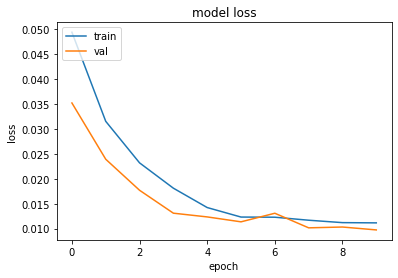



Training on STNDING


Epoch 1/10
3095/3095 [==============================] - 44s 14ms/step - loss: 0.0302 - val_loss: 0.0261
Epoch 2/10
3095/3095 [==============================] - 46s 15ms/step - loss: 0.0251 - val_loss: 0.0259
Epoch 3/10
3095/3095 [==============================] - 47s 15ms/step - loss: 0.0245 - val_loss: 0.0247
Epoch 4/10
3095/3095 [==============================] - 48s 16ms/step - loss: 0.0242 - val_loss: 0.0217
Epoch 5/10
3095/3095 [==============================] - 47s 15ms/step - loss: 0.0204 - val_loss: 0.0198
Epoch 6/10
3095/3095 [==============================] - 46s 15ms/step - loss: 0.0191 - val_loss: 0.0188
Epoch 7/10
3095/3095 [==============================] - 46s 15ms/step - loss: 0.0186 - val_loss: 0.0189
Epoch 8/10
3095/3095 [==============================] - 45s 14ms/step - loss: 0.0182 - val_loss: 0.0181
Epoch 9/10
3095/3095 [==============================] - 46s 15ms/step - loss: 0.0180 - val_loss: 0.0179
Epoch 10/10
3095/3095 [=================

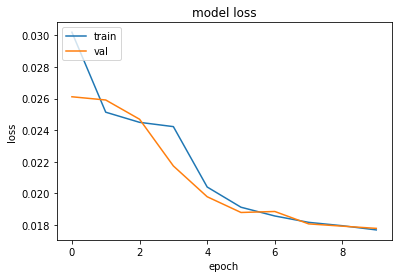



Training on WALKING


Epoch 1/10
1825/1825 [==============================] - 27s 14ms/step - loss: 0.6574 - val_loss: 0.4720
Epoch 2/10
1825/1825 [==============================] - 28s 15ms/step - loss: 0.4192 - val_loss: 0.3957
Epoch 3/10
1825/1825 [==============================] - 28s 15ms/step - loss: 0.3660 - val_loss: 0.3626
Epoch 4/10
1825/1825 [==============================] - 27s 15ms/step - loss: 0.3367 - val_loss: 0.3463
Epoch 5/10
1825/1825 [==============================] - 27s 15ms/step - loss: 0.3160 - val_loss: 0.3226
Epoch 6/10
1825/1825 [==============================] - 27s 15ms/step - loss: 0.3009 - val_loss: 0.3070
Epoch 7/10
1825/1825 [==============================] - 28s 15ms/step - loss: 0.2894 - val_loss: 0.3054
Epoch 8/10
1825/1825 [==============================] - 27s 15ms/step - loss: 0.2787 - val_loss: 0.2914
Epoch 9/10
1825/1825 [==============================] - 27s 15ms/step - loss: 0.2709 - val_loss: 0.2856
Epoch 10/10
1825/1825 [=================

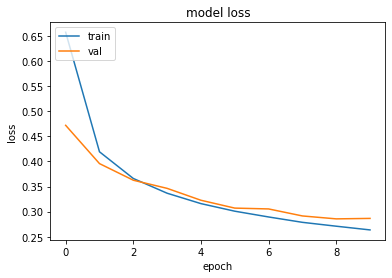



Training on XLYINGX


Epoch 1/10
713/713 [==============================] - 10s 14ms/step - loss: 0.0716 - val_loss: 0.0661
Epoch 2/10
713/713 [==============================] - 11s 15ms/step - loss: 0.0475 - val_loss: 0.0425
Epoch 3/10
713/713 [==============================] - 10s 14ms/step - loss: 0.0406 - val_loss: 0.0421
Epoch 4/10
713/713 [==============================] - 10s 14ms/step - loss: 0.0397 - val_loss: 0.0423
Epoch 5/10
713/713 [==============================] - 10s 14ms/step - loss: 0.0388 - val_loss: 0.0406
Epoch 6/10
713/713 [==============================] - 11s 15ms/step - loss: 0.0383 - val_loss: 0.0391
Epoch 7/10
713/713 [==============================] - 11s 15ms/step - loss: 0.0375 - val_loss: 0.0404
Epoch 8/10
713/713 [==============================] - 11s 15ms/step - loss: 0.0339 - val_loss: 0.0349
Epoch 9/10
713/713 [==============================] - 11s 16ms/step - loss: 0.0305 - val_loss: 0.0322
Epoch 10/10
713/713 [==============================] - 11s

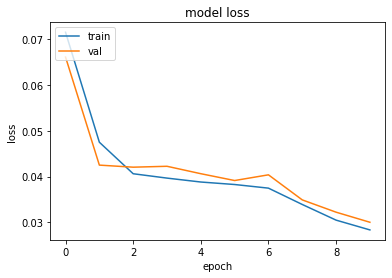

In [16]:
from models import Encoder, Decoder

ensebles = []
encoded_space_dim = 64
epochs = 50

for i in range(num_labels):
    print("\n\nTraining on " + str(le.inverse_transform([i])[0]) + "\n\n")
    X_train_enseble = X_train[y_train == i]
    encoder = Encoder(encoded_space_dim)
    decoder = Decoder()
    autoencoder = tf.keras.Sequential([encoder, decoder])
    autoencoder.compile(optimizer='adam', loss='mse')
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    history = autoencoder.fit(X_train_enseble, X_train_enseble,
                epochs=epochs,
                shuffle=True,
                batch_size=16,
                validation_split=0.2,
                callbacks=[callback]
                )
    
    ensebles.append(autoencoder)

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [17]:
predictions = []
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(10000).batch(1000)
for sample, label in test_dataset:
    mse = []
    for ens in range(num_labels):
        out = ensebles[ens].predict(sample)
        loss = tf.keras.losses.mean_squared_error(sample, out)
        loss = np.mean(loss, axis=1)
        mse.append(loss)
    mse = np.array(mse).T
    pred = np.argmin(mse, axis=1)
    for i in range(len(pred)):
        predictions.append(pred[i])

In [18]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, predictions)
acc = np.trace(conf) / np.sum(conf)
print(acc)

0.20696994678857827


In [19]:
#autoencoder.summary()

In [20]:
#autoencoder.encoder.summary()

In [21]:
#autoencoder.decoder.summary()

In [25]:
X_trans = autoencoder(X_test[:1000])


Text(0.5, 1.0, 'Pred Acc 1')

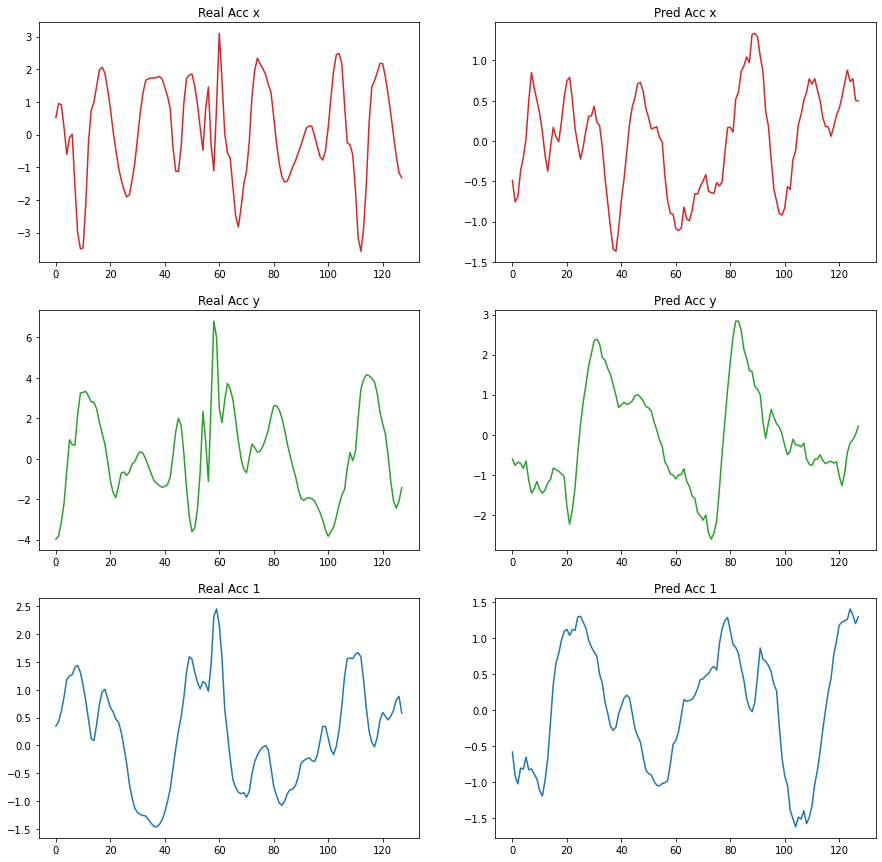

In [26]:
measure = 59
fig, axs = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
axs[0, 0].set_title('Real Acc x')
axs[0, 1].plot(X_trans[measure,:,0], 'tab:red')
axs[0, 1].set_title('Pred Acc x')

axs[1, 0].plot(X_train[measure,:,1], 'tab:green')
axs[1, 0].set_title('Real Acc y')
axs[1, 1].plot(X_trans[measure,:,1], 'tab:green')
axs[1, 1].set_title('Pred Acc y')

axs[2, 0].plot(X_train[measure,:,2], 'tab:blue')
axs[2, 0].set_title('Real Acc 1')
axs[2, 1].plot(X_trans[measure,:,2], 'tab:blue')
axs[2, 1].set_title('Pred Acc 1')






In [27]:
### Get the encoded representation of the test samples
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(10000).batch(1000)
encoded_samples = []
labels = []
for sample, label in test_dataset:
    output = encoder(sample)
    # Append to list
    encoded = output.numpy()
    for i in range(len(encoded)):
      enc = encoded[i]
      lbl = label[i]
      encoded_samples.append(enc)
      labels.append(lbl)
    if len(encoded_samples) % 10000 == 0:
      break
labels = np.array(labels)

In [28]:
print(np.array(encoded_samples).shape)

(10000, 64)


In [29]:
from sklearn import manifold
tsne = manifold.TSNE(2, init='pca', random_state=0).fit_transform(encoded_samples)

In [30]:
labels = le.inverse_transform(labels) 

In [31]:
import plotly.express as px
px.scatter(x=tsne[:,0], y=tsne[:,1], color=labels, opacity=0.7)

In [32]:
for l in encoder.layers:
    l.trainable = False
linear =  tf.keras.models.Sequential([layer.Dense(512, activation='relu'), layer.Dense(num_labels, activation='softmax')])
model = tf.keras.models.Sequential([encoder, linear])
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam', loss=loss_function, metrics=['acc'])

In [33]:
print(X_train.shape)
print(y_train.shape)

(155666, 128, 9)
(155666,)


In [34]:
history = model.fit(X_train, y_train,
                epochs=10,
                shuffle=True,
                batch_size=64,
                validation_split=0.2)

Epoch 1/10
1946/1946 [==============================] - 12s 6ms/step - loss: 0.7855 - acc: 0.6878 - val_loss: 0.7110 - val_acc: 0.7108
Epoch 2/10
1946/1946 [==============================] - 12s 6ms/step - loss: 0.6847 - acc: 0.7226 - val_loss: 0.6637 - val_acc: 0.7340
Epoch 3/10
1946/1946 [==============================] - 12s 6ms/step - loss: 0.6551 - acc: 0.7367 - val_loss: 0.6488 - val_acc: 0.7384
Epoch 4/10
1946/1946 [==============================] - 12s 6ms/step - loss: 0.6341 - acc: 0.7433 - val_loss: 0.6301 - val_acc: 0.7461
Epoch 5/10
1946/1946 [==============================] - 12s 6ms/step - loss: 0.6204 - acc: 0.7498 - val_loss: 0.6292 - val_acc: 0.7462
Epoch 6/10
1946/1946 [==============================] - 12s 6ms/step - loss: 0.6070 - acc: 0.7535 - val_loss: 0.6273 - val_acc: 0.7477
Epoch 7/10
1946/1946 [==============================] - 12s 6ms/step - loss: 0.5979 - acc: 0.7566 - val_loss: 0.6028 - val_acc: 0.7564
Epoch 8/10
1946/1946 [==============================] -

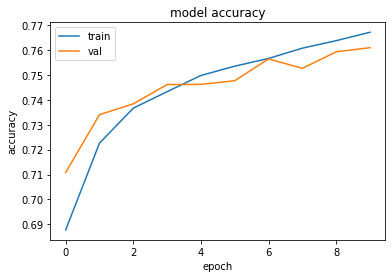

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)

2085/2085 - 5s - loss: 0.6008 - acc: 0.7610


In [37]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [38]:
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = converter.convert()
#with open('model.tflite', 'wb') as f:
#  f.write(tflite_model)

In [39]:
from sklearn.metrics import precision_score, recall_score

#None, 'micro', 'macro', 'weighted'
precisions = precision_score(y_test, y_pred, average=None)
recalls = recall_score(y_test, y_pred, average=None)
print("Precision score: ", precisions)
print("Recall score: ", recalls)

Precision score:  [0.75862069 0.87465565 0.97849462 0.69386356 0.67295861 0.9535999
 0.56906534]
Recall score:  [0.41025641 0.76047904 0.95674377 0.46646693 0.9072231  0.97902679
 0.11269451]


In [40]:
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": Precision " + str(precisions[i]) + " Recall " + str(recalls[i]))

FALLING: Precision 0.7586206896551724 Recall 0.41025641025641024
JUMPING: Precision 0.8746556473829201 Recall 0.7604790419161677
RUNNING: Precision 0.978494623655914 Recall 0.956743766896966
SITTING: Precision 0.6938635584504628 Recall 0.46646692786356303
STNDING: Precision 0.6729586129753915 Recall 0.9072231018623238
WALKING: Precision 0.9535999003487793 Recall 0.979026791994373
XLYINGX: Precision 0.5690653432588917 Recall 0.1126945126945127


In [41]:
from sklearn.metrics import f1_score

f1_scores = f1_score(y_test, y_pred, average=None)
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": F1-score " + str(f1_scores[i]))

FALLING: F1-score 0.5325264750378214
JUMPING: F1-score 0.8135810377962843
RUNNING: F1-score 0.9674969623329284
SITTING: F1-score 0.557883131201764
STNDING: F1-score 0.7727258131843432
WALKING: F1-score 0.966146079823316
XLYINGX: F1-score 0.18813234891987968


In [42]:
import matplotlib.cm

def plot_confusion_matrix(predictions, labels, target_names):

  '''
  ============================
  Internal function definition
  ============================
  '''
  def _confusion_matrix(cm,
                            target_names,
                            title='Confusion matrix',
                            cmap=None):
      import itertools

      accuracy = np.trace(cm) / float(np.sum(cm))
      misclass = 1 - accuracy

      if cmap is None:
          cmap = plt.get_cmap('Reds')
      
      cm = cm.astype('float')
      for i in range(len(cm)):
        cm[i] /= float(np.sum(cm[i]))

      plt.figure(figsize=(16, 12))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()

      if target_names is not None:
          tick_marks = np.arange(len(target_names))
          plt.xticks(tick_marks, target_names, rotation=45)
          plt.yticks(tick_marks, target_names)


      thresh = cm.max() / 2
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                      horizontalalignment="center",
                      color="white" if cm[i, j] > thresh else "black")
              


      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
      plt.show()
  '''
  ===================================
  End of internal function definition
  ===================================
  '''

  from sklearn.metrics import confusion_matrix

  conf_mat = confusion_matrix(predictions, labels)
  _confusion_matrix(conf_mat, target_names=target_names)

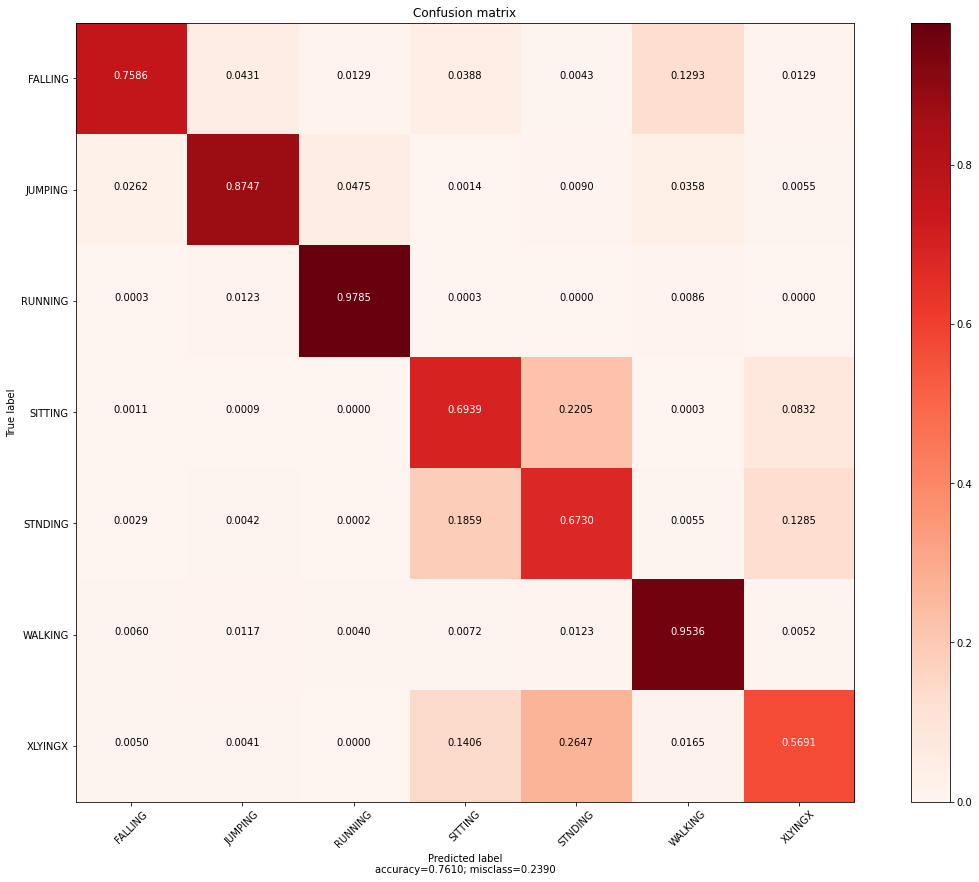

In [43]:
plot_confusion_matrix(y_pred, y_test, target_names=le.classes_)

In [44]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(10000).batch(1000)
encoded_samples = []
labels = []
for sample, label in test_dataset:
    output = encoder(sample)
    # Append to list
    encoded = output.numpy()
    for i in range(len(encoded)):
      enc = encoded[i]
      lbl = label[i]
      encoded_samples.append(enc)
      labels.append(lbl)
    if len(encoded_samples) % 10000 == 0:
      break
labels = np.array(labels)